## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

## Import mnist dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", cache=True, version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [51]:
x, y = mnist['data'], mnist['target']

In [52]:
print(x.shape, y, sep="\n\n")

(70000, 784)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [53]:
x = x.iloc[:, :].values # if doing it in jupyter or else x is fine
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
y = y.astype(np.uint8) # converting char to int
y = y.values # for jupyter notebook

In [55]:
y[0], y

(5, array([5, 0, 4, ..., 4, 5, 6], dtype=uint8))

In [56]:
digit = x[0]
digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [57]:
digit = digit.reshape((28, 28))

## Visualizing digit

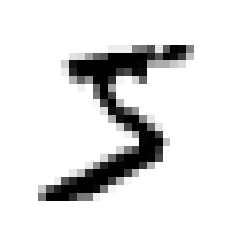

In [58]:
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(digit, cmap=matplotlib.cm.binary) # imshow
plt.axis("off")
plt.show()

## splitting dataset into train and test set

In [59]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [60]:
shuffling_index = np.random.permutation(60000)
shuffling_index

array([58518, 15294, 24108, ..., 55701, 19684, 36071])

In [61]:
x_train, y_train = x_train[shuffling_index], y_train[shuffling_index]

In [62]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## SGD Classifier

In [63]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=20, tol=np.infty)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(max_iter=20, tol=inf)

## Predicting on the classifier

In [64]:
sgd_clf.predict([x[11]])

array([ True])

In [65]:
sgd_clf.predict(x_test)

array([False, False, False, ..., False,  True, False])

## Performance Measure using Cross-Validation

In [68]:
from sklearn.model_selection import cross_val_score # model_selection
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.9586, 0.9233, 0.9467])

In [71]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

## Dumb Classifier

In [69]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [70]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.9093 , 0.91   , 0.90965])

finding accuracy for sgd classifier and dumb classifier and so seeing that sgd is not a nice classifier for this dataset

## Performance Measures

### confusion matrix

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53621,   958],
       [ 1779,  3642]], dtype=int64)

### precision

In [73]:
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.7917391304347826

### recall

In [74]:
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.6718317653569452

### f1 score

In [75]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.726873565512424

### classification report

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98     54579
        True       0.79      0.67      0.73      5421

    accuracy                           0.95     60000
   macro avg       0.88      0.83      0.85     60000
weighted avg       0.95      0.95      0.95     60000

